--- Prueba de MCPS con cálculo de ECRPS ---

Usando 180 puntos para predecir. Valor real: 0.1376

Ejecutando mcps_model.fit_predict()...

--- Resultados de la Evaluación ---
La distribución empírica tiene 7 resultados únicos.
ECRPS del modelo MCPS vs. Teórica: 0.3374


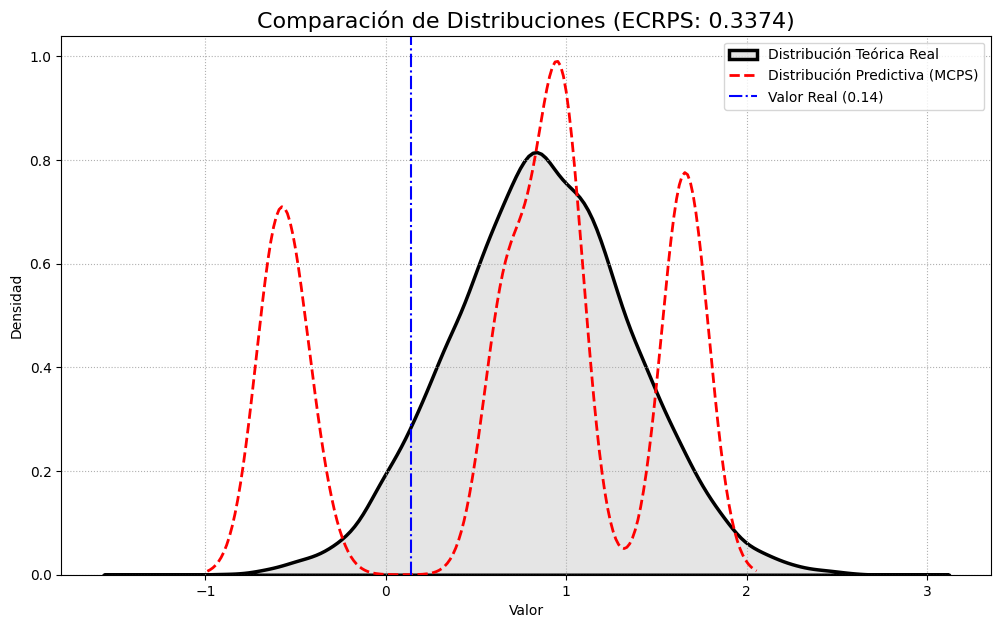

In [1]:
from pipeline import ARMASimulation, MondrianCPSModel, ecrps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if __name__ == "__main__":
    
    print("--- Prueba de MCPS con cálculo de ECRPS ---")
    
    SEED = 42
    rng_eval = np.random.default_rng(SEED) # Generador para la evaluación
    simulator = ARMASimulation(phi=[0.9], sigma=0.5, seed=SEED)
    full_series, full_errors = simulator.simulate(n=200)
    
    history_len = 180
    history_series, history_errors = full_series[:history_len], full_errors[:history_len]
    true_future_value = full_series[history_len]
    
    print(f"\nUsando {history_len} puntos para predecir. Valor real: {true_future_value:.4f}")
    
    mcps_model = MondrianCPSModel(n_lags=12, n_bins=8, test_size=0.3, random_state=SEED, verbose=False)
    
    print("\nEjecutando mcps_model.fit_predict()...")
    predictive_distribution = mcps_model.fit_predict(history_series)
    
    # --- CÁLCULO DE MÉTRICAS (NUEVA SECCIÓN) ---
    
    # 1. Extraer valores y probabilidades de la salida del modelo
    values = [d['value'] for d in predictive_distribution]
    probs = [d['probability'] for d in predictive_distribution]
    
    # 2. Generar muestras a partir de la distribución empírica (PARA EVALUACIÓN)
    n_samples_for_eval = 10000
    samples_from_model = rng_eval.choice(
        values, size=n_samples_for_eval, p=probs, replace=True
    )
    
    # 3. Obtener las muestras de la distribución teórica real
    theoretical_samples = simulator.get_true_next_step_samples(history_series, history_errors, n_samples=n_samples_for_eval)
    
    # 4. Calcular el ECRPS
    score_ecrps = ecrps(samples_from_model, theoretical_samples)
    
    print("\n--- Resultados de la Evaluación ---")
    print(f"La distribución empírica tiene {len(values)} resultados únicos.")
    print(f"ECRPS del modelo MCPS vs. Teórica: {score_ecrps:.4f}")
    
    # --- VISUALIZACIÓN ---
    expected_value = np.sum(np.array(values) * np.array(probs))
    
    plt.figure(figsize=(12, 7))
    sns.kdeplot(theoretical_samples, label='Distribución Teórica Real', color='black', lw=2.5, fill=True, alpha=0.1)
    sns.kdeplot(samples_from_model, label='Distribución Predictiva (MCPS)', color='red', linestyle='--', lw=2)
    plt.axvline(true_future_value, color='blue', linestyle='-.', label=f'Valor Real ({true_future_value:.2f})')
    
    # Añadir el ECRPS al título para un informe completo
    plt.title(f"Comparación de Distribuciones (ECRPS: {score_ecrps:.4f})", fontsize=16)
    
    plt.xlabel("Valor"); plt.ylabel("Densidad"); plt.legend(); plt.grid(True, ls=':')
    plt.show()

INICIANDO PRUEBA RÁPIDA CON 2 ESCENARIOS


Ejecutando escenarios:   0%|          | 0/2 [00:00<?, ?it/s]


--- Ejecutando Escenario 1: AR(1) con ruido normal y σ=0.45 ---
ERROR en escenario 1 (AR(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  50%|█████     | 1/2 [00:06<00:06,  6.39s/it]


--- Ejecutando Escenario 2: AR(1) con ruido normal y σ=0.71 ---
ERROR en escenario 2 (AR(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]



--- Ejecución de todos los escenarios completada. ---


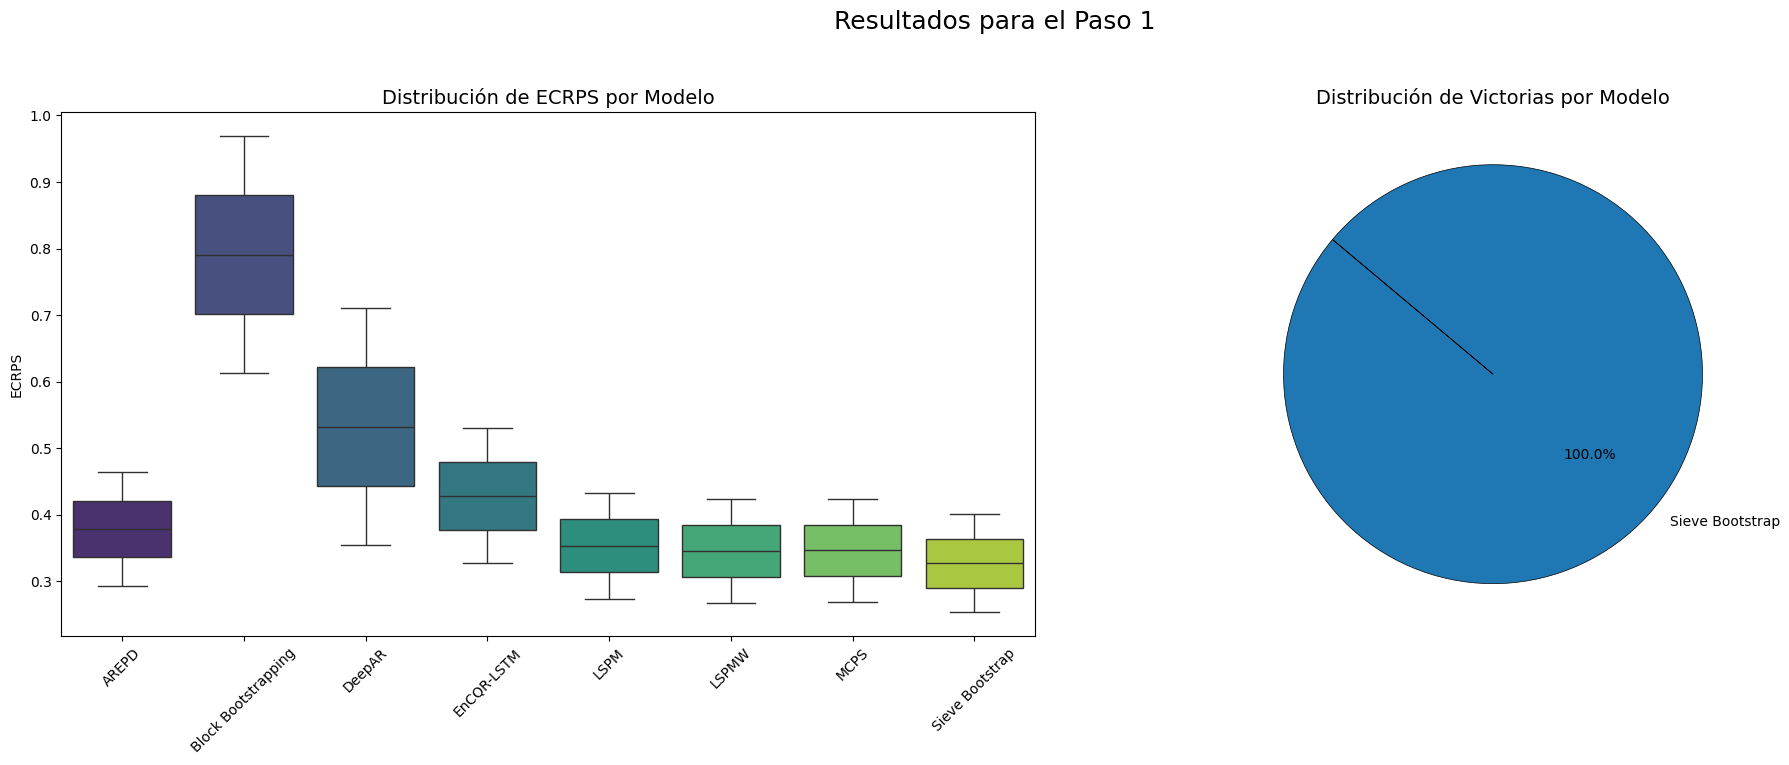

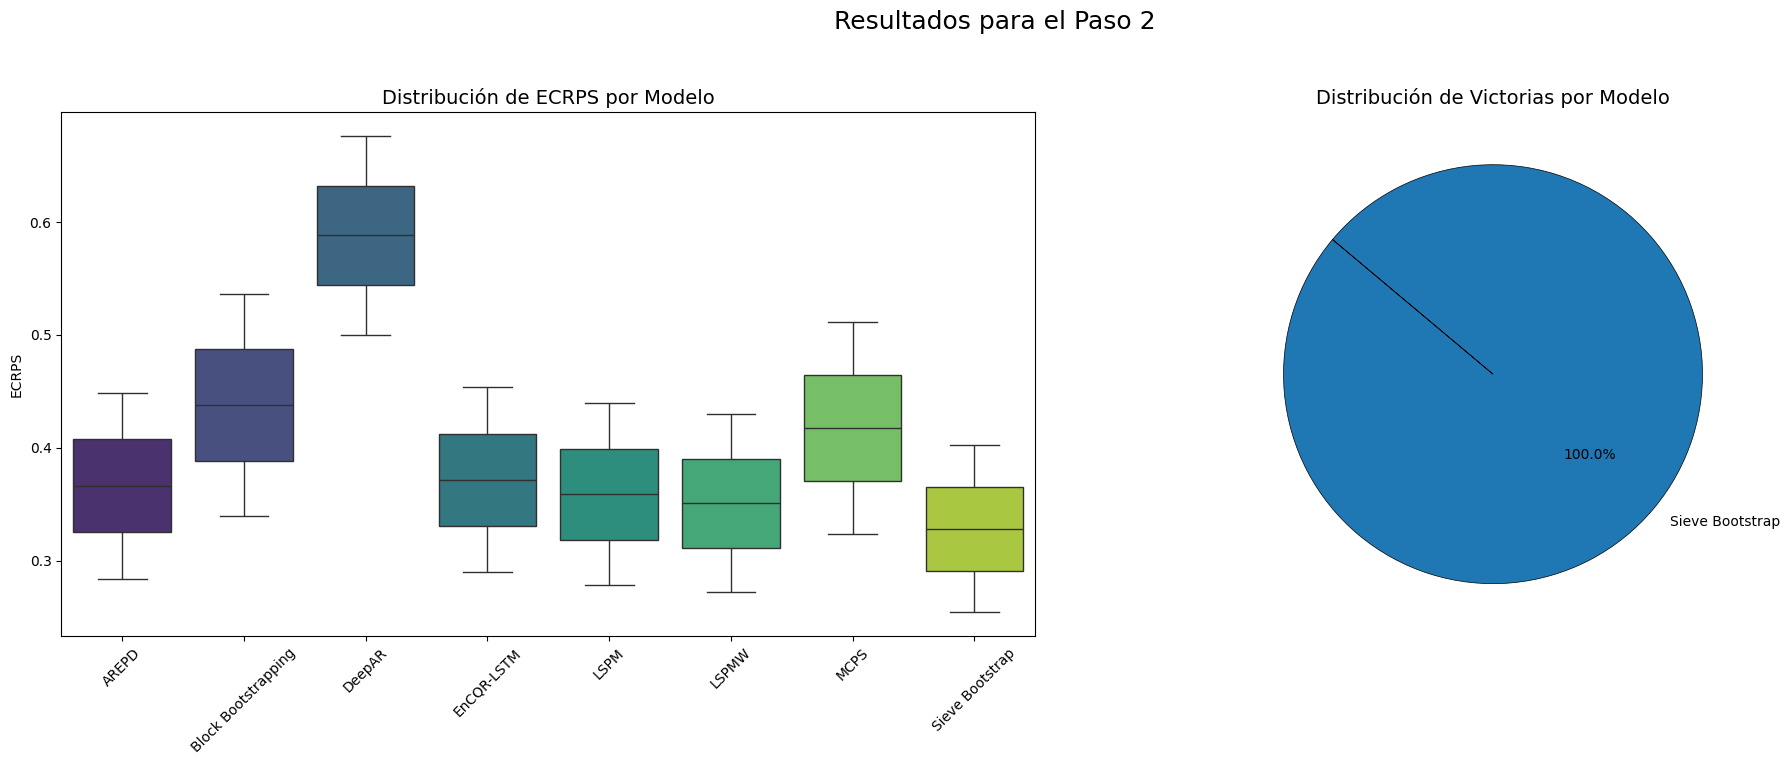

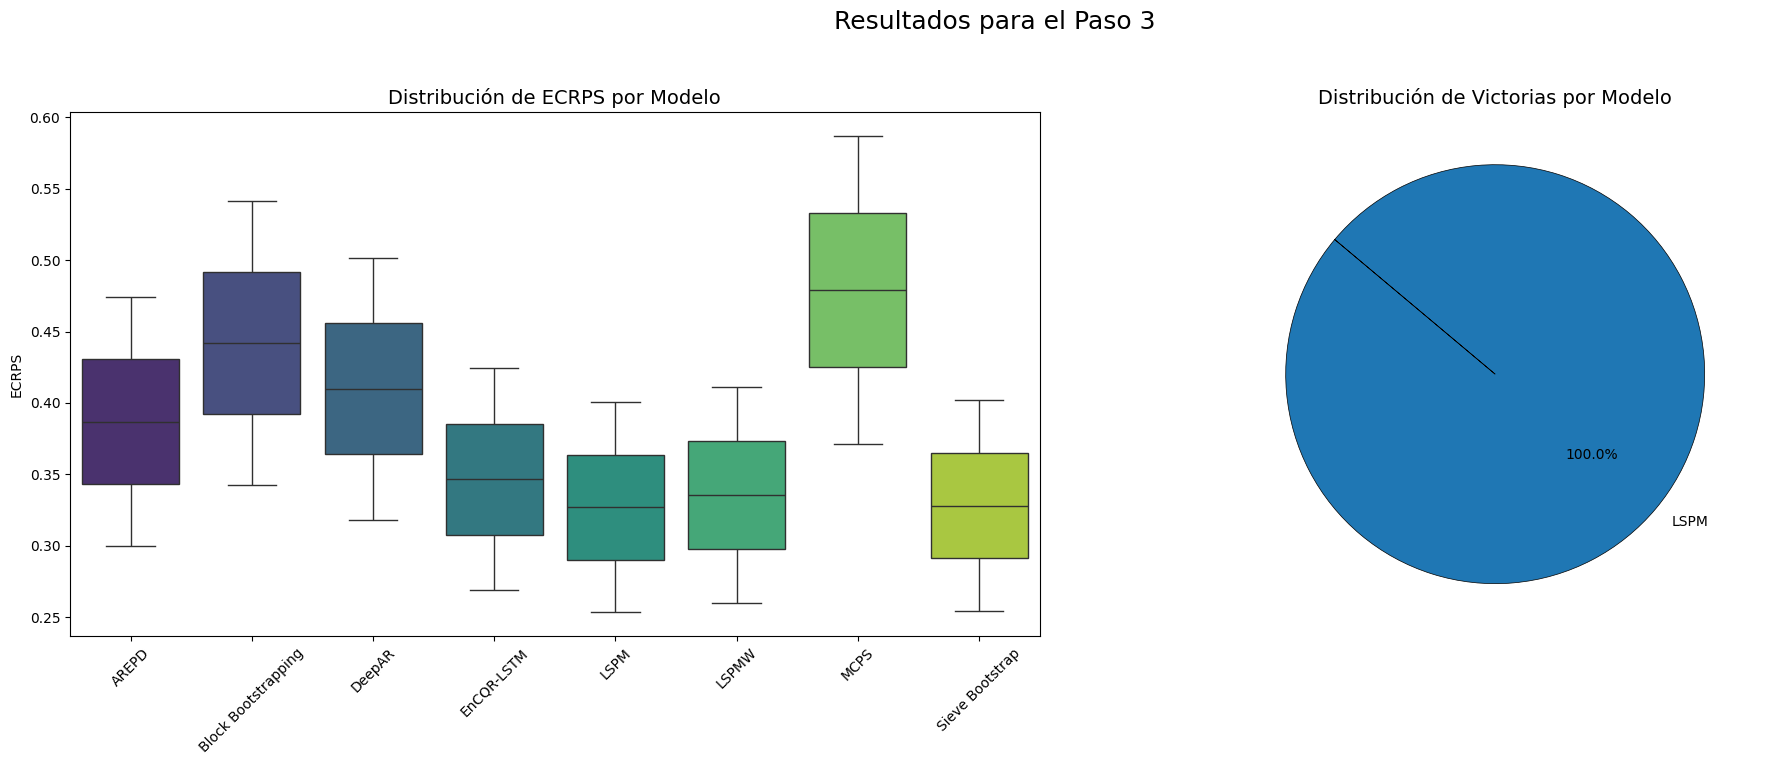

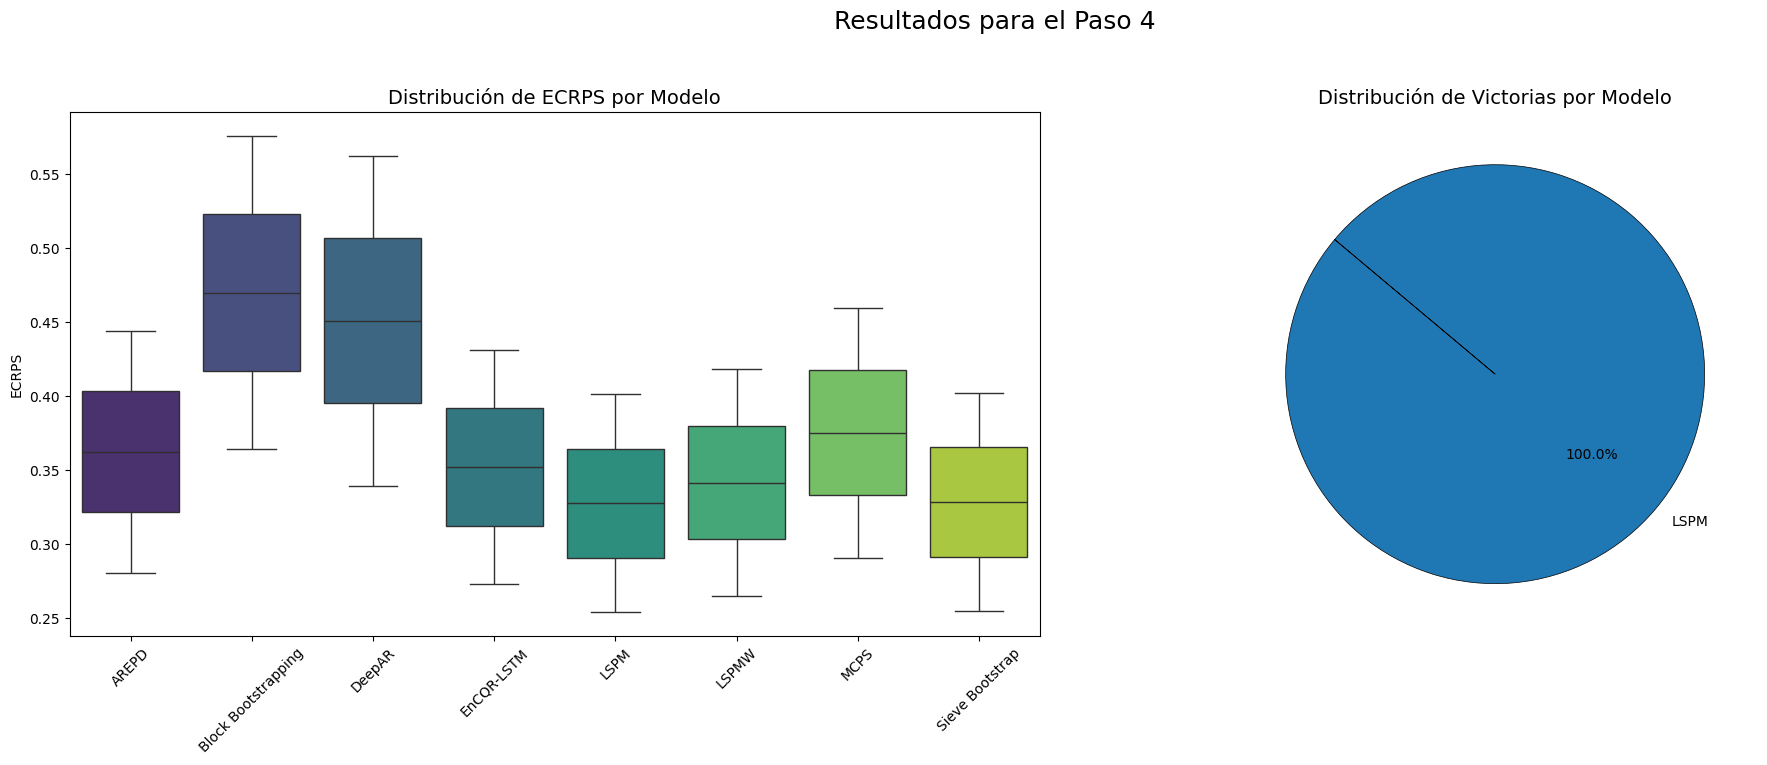

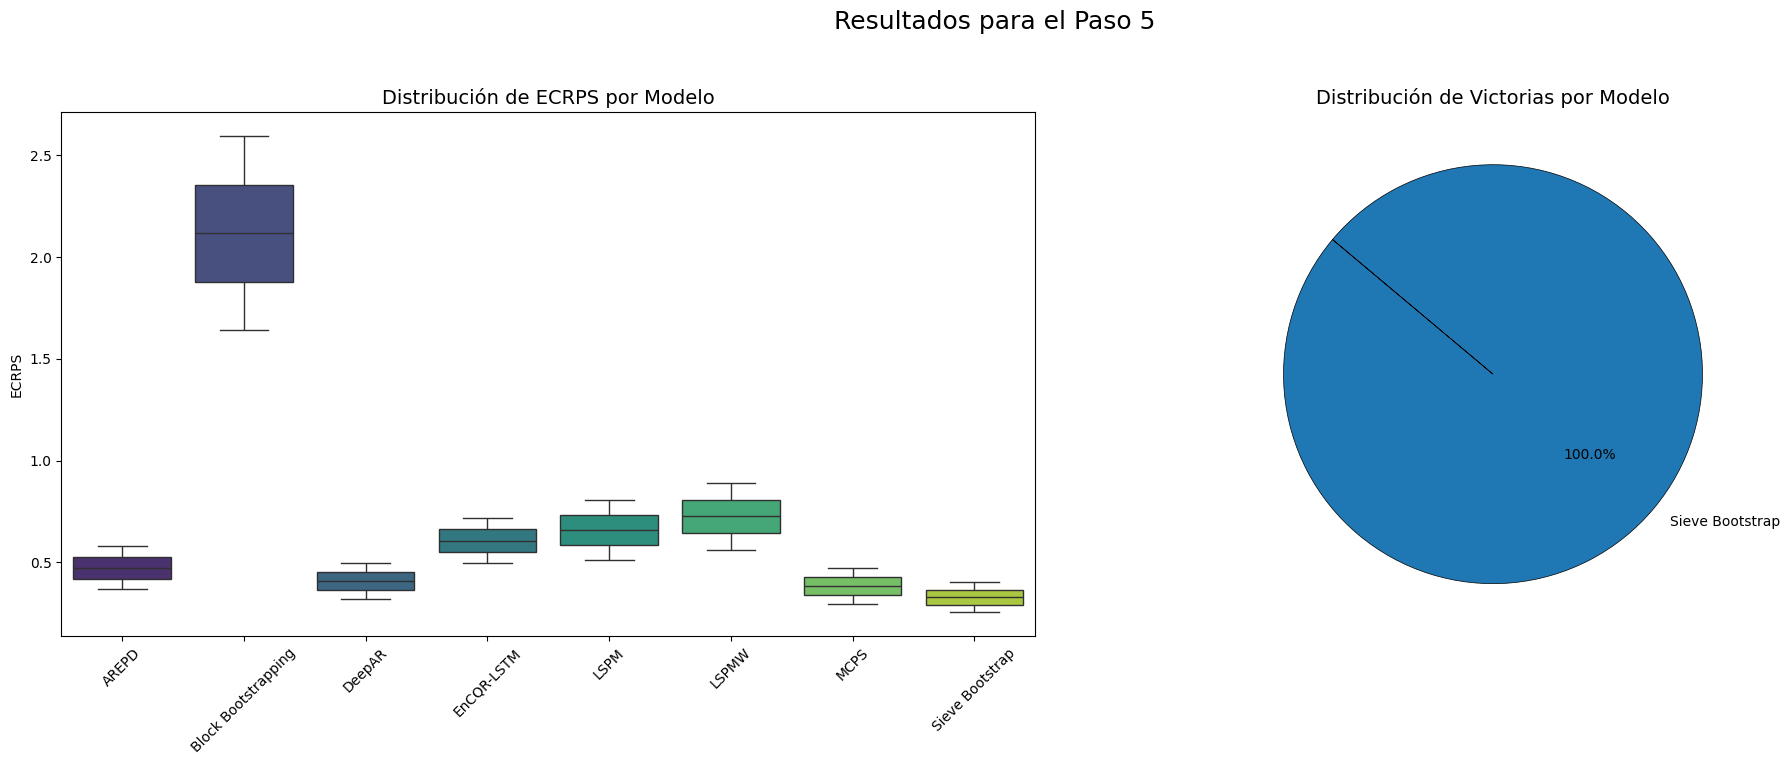

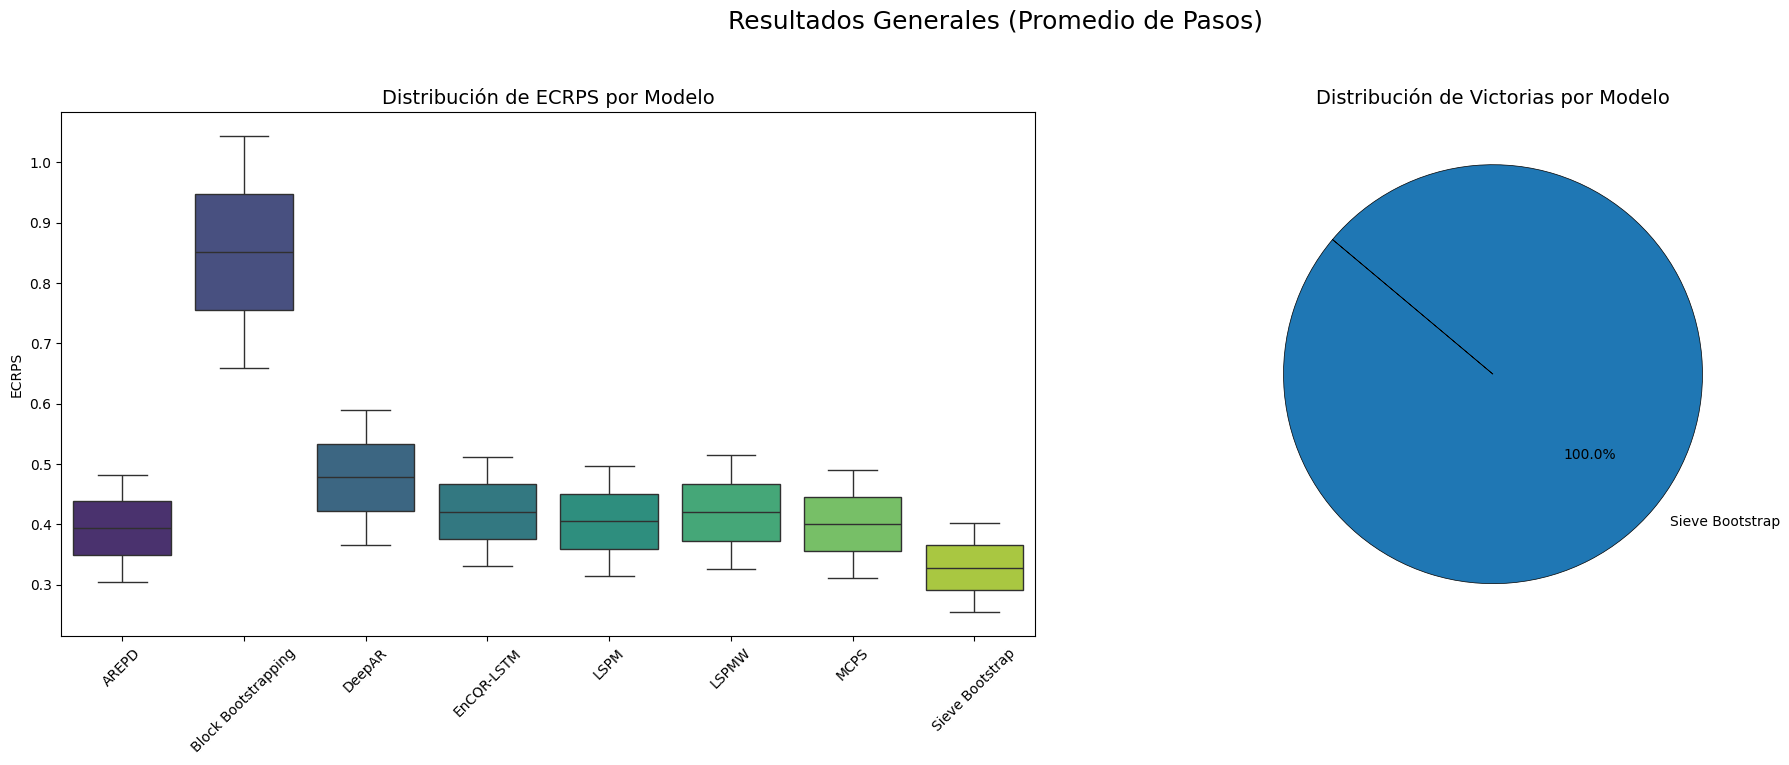



PRUEBA RÁPIDA FINALIZADA. Revisa el Excel 'resultados_prueba_2_escenarios.xlsx' y los gráficos generados.


In [1]:
from pipeline import ScenarioRunnerAdaptado
import warnings

warnings.filterwarnings("ignore")

# ===================================================================
# SECCIÓN PRINCIPAL: Cómo ejecutar el código
# ===================================================================
if __name__ == '__main__':

    # -------------------------------------------------------------------
    # Opción 1: Prueba Rápida con los 2 primeros escenarios
    # -------------------------------------------------------------------
    print("="*80)
    print("INICIANDO PRUEBA RÁPIDA CON 2 ESCENARIOS")
    print("="*80)
    
    runner_prueba = ScenarioRunnerAdaptado(seed=42)
    runner_prueba.run(n_scenarios=2)
    
    print("\n\nPRUEBA RÁPIDA FINALIZADA. Revisa el Excel 'resultados_prueba_2_escenarios.xlsx' y los gráficos generados.")
    print("="*80)


    # -------------------------------------------------------------------
    # Opción 2: Ejecución Completa con 120 escenarios
    # -------------------------------------------------------------------
    # DESCOMENTA LAS SIGUIENTES LÍNEAS PARA LA EJECUCIÓN COMPLETA
    # -------------------------------------------------------------------
    
    # print("\n"*3)
    # print("="*80)
    # print("INICIANDO EJECUCIÓN COMPLETA CON 120 ESCENARIOS")
    # print("="*80)

    # runner_completo = ScenarioRunnerAdaptado(seed=420)
    # runner_completo.run(n_scenarios=120)
    
    # runner_completo.save_results_to_excel("resultados_completos_120_escenarios.xlsx")
    # runner_completo.plot_results()

    # print("\n\nEJECUCIÓN COMPLETA FINALIZADA. Revisa el Excel 'resultados_completos_120_escenarios.xlsx' y los gráficos.")
    # print("="*80)

Ejecutando escenarios:   0%|          | 0/120 [00:00<?, ?it/s]


--- Ejecutando Escenario 1: AR(1) con ruido normal y σ=0.45 ---


Ejecutando escenarios:   1%|          | 1/120 [00:04<09:49,  4.96s/it]

ERROR en escenario 1 (AR(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 2: AR(1) con ruido normal y σ=0.71 ---


Ejecutando escenarios:   2%|▏         | 2/120 [00:09<09:13,  4.69s/it]

ERROR en escenario 2 (AR(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 3: AR(1) con ruido normal y σ=1.00 ---


Ejecutando escenarios:   2%|▎         | 3/120 [00:14<09:05,  4.66s/it]

ERROR en escenario 3 (AR(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 4: AR(1) con ruido normal y σ=1.73 ---


Ejecutando escenarios:   3%|▎         | 4/120 [00:18<09:00,  4.66s/it]

ERROR en escenario 4 (AR(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 5: AR(1) con ruido uniform y σ=0.45 ---


Ejecutando escenarios:   4%|▍         | 5/120 [00:23<09:14,  4.82s/it]

ERROR en escenario 5 (AR(1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 6: AR(1) con ruido uniform y σ=0.71 ---


Ejecutando escenarios:   5%|▌         | 6/120 [00:29<09:34,  5.04s/it]

ERROR en escenario 6 (AR(1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 7: AR(1) con ruido uniform y σ=1.00 ---
ERROR en escenario 7 (AR(1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:   6%|▌         | 7/120 [00:35<10:08,  5.38s/it]


--- Ejecutando Escenario 8: AR(1) con ruido uniform y σ=1.73 ---
ERROR en escenario 8 (AR(1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:   7%|▋         | 8/120 [00:41<10:24,  5.58s/it]


--- Ejecutando Escenario 9: AR(1) con ruido exponential y σ=0.45 ---
ERROR en escenario 9 (AR(1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:   8%|▊         | 9/120 [00:47<10:39,  5.76s/it]


--- Ejecutando Escenario 10: AR(1) con ruido exponential y σ=0.71 ---


Ejecutando escenarios:   8%|▊         | 10/120 [00:53<10:52,  5.93s/it]

ERROR en escenario 10 (AR(1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 11: AR(1) con ruido exponential y σ=1.00 ---
ERROR en escenario 11 (AR(1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:   9%|▉         | 11/120 [01:00<11:22,  6.26s/it]


--- Ejecutando Escenario 12: AR(1) con ruido exponential y σ=1.73 ---
ERROR en escenario 12 (AR(1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  10%|█         | 12/120 [01:07<11:14,  6.25s/it]


--- Ejecutando Escenario 13: AR(1) con ruido t-student y σ=0.45 ---


Ejecutando escenarios:  11%|█         | 13/120 [01:10<09:39,  5.42s/it]

ERROR en escenario 13 (AR(1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 14: AR(1) con ruido t-student y σ=0.71 ---


Ejecutando escenarios:  12%|█▏        | 14/120 [01:13<08:26,  4.78s/it]

ERROR en escenario 14 (AR(1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 15: AR(1) con ruido t-student y σ=1.00 ---
ERROR en escenario 15 (AR(1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  12%|█▎        | 15/120 [01:17<07:33,  4.32s/it]


--- Ejecutando Escenario 16: AR(1) con ruido t-student y σ=1.73 ---
ERROR en escenario 16 (AR(1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  13%|█▎        | 16/120 [01:20<07:11,  4.15s/it]


--- Ejecutando Escenario 17: AR(1) con ruido mixture y σ=0.45 ---
ERROR en escenario 17 (AR(1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  14%|█▍        | 17/120 [01:26<07:47,  4.54s/it]


--- Ejecutando Escenario 18: AR(1) con ruido mixture y σ=0.71 ---
ERROR en escenario 18 (AR(1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  15%|█▌        | 18/120 [01:31<08:11,  4.82s/it]


--- Ejecutando Escenario 19: AR(1) con ruido mixture y σ=1.00 ---
ERROR en escenario 19 (AR(1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  16%|█▌        | 19/120 [01:37<08:26,  5.02s/it]


--- Ejecutando Escenario 20: AR(1) con ruido mixture y σ=1.73 ---
ERROR en escenario 20 (AR(1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  17%|█▋        | 20/120 [01:42<08:39,  5.19s/it]


--- Ejecutando Escenario 21: AR(2) con ruido normal y σ=0.45 ---
ERROR en escenario 21 (AR(2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  18%|█▊        | 21/120 [01:48<08:58,  5.44s/it]


--- Ejecutando Escenario 22: AR(2) con ruido normal y σ=0.71 ---
ERROR en escenario 22 (AR(2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  18%|█▊        | 22/120 [01:55<09:14,  5.66s/it]


--- Ejecutando Escenario 23: AR(2) con ruido normal y σ=1.00 ---
ERROR en escenario 23 (AR(2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  19%|█▉        | 23/120 [02:01<09:25,  5.83s/it]


--- Ejecutando Escenario 24: AR(2) con ruido normal y σ=1.73 ---
ERROR en escenario 24 (AR(2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  20%|██        | 24/120 [02:07<09:34,  5.98s/it]


--- Ejecutando Escenario 25: AR(2) con ruido uniform y σ=0.45 ---
ERROR en escenario 25 (AR(2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  21%|██        | 25/120 [02:13<09:25,  5.95s/it]


--- Ejecutando Escenario 26: AR(2) con ruido uniform y σ=0.71 ---
ERROR en escenario 26 (AR(2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  22%|██▏       | 26/120 [02:19<09:05,  5.80s/it]


--- Ejecutando Escenario 27: AR(2) con ruido uniform y σ=1.00 ---


Ejecutando escenarios:  22%|██▎       | 27/120 [02:22<08:06,  5.24s/it]

ERROR en escenario 27 (AR(2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 28: AR(2) con ruido uniform y σ=1.73 ---


Ejecutando escenarios:  23%|██▎       | 28/120 [02:26<07:25,  4.84s/it]

ERROR en escenario 28 (AR(2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 29: AR(2) con ruido exponential y σ=0.45 ---


Ejecutando escenarios:  24%|██▍       | 29/120 [02:30<06:49,  4.50s/it]

ERROR en escenario 29 (AR(2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 30: AR(2) con ruido exponential y σ=0.71 ---


Ejecutando escenarios:  25%|██▌       | 30/120 [02:34<06:33,  4.38s/it]

ERROR en escenario 30 (AR(2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 31: AR(2) con ruido exponential y σ=1.00 ---


Ejecutando escenarios:  26%|██▌       | 31/120 [02:38<06:20,  4.28s/it]

ERROR en escenario 31 (AR(2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 32: AR(2) con ruido exponential y σ=1.73 ---


Ejecutando escenarios:  27%|██▋       | 32/120 [02:42<06:16,  4.28s/it]

ERROR en escenario 32 (AR(2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 33: AR(2) con ruido t-student y σ=0.45 ---
ERROR en escenario 33 (AR(2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  28%|██▊       | 33/120 [02:47<06:24,  4.42s/it]


--- Ejecutando Escenario 34: AR(2) con ruido t-student y σ=0.71 ---
ERROR en escenario 34 (AR(2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  28%|██▊       | 34/120 [02:53<06:42,  4.68s/it]


--- Ejecutando Escenario 35: AR(2) con ruido t-student y σ=1.00 ---
ERROR en escenario 35 (AR(2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  29%|██▉       | 35/120 [02:59<07:32,  5.33s/it]


--- Ejecutando Escenario 36: AR(2) con ruido t-student y σ=1.73 ---
ERROR en escenario 36 (AR(2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  30%|███       | 36/120 [03:06<08:08,  5.82s/it]


--- Ejecutando Escenario 37: AR(2) con ruido mixture y σ=0.45 ---
ERROR en escenario 37 (AR(2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  31%|███       | 37/120 [03:11<07:42,  5.57s/it]


--- Ejecutando Escenario 38: AR(2) con ruido mixture y σ=0.71 ---
ERROR en escenario 38 (AR(2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  32%|███▏      | 38/120 [03:16<07:14,  5.30s/it]


--- Ejecutando Escenario 39: AR(2) con ruido mixture y σ=1.00 ---
ERROR en escenario 39 (AR(2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  32%|███▎      | 39/120 [03:21<06:59,  5.17s/it]


--- Ejecutando Escenario 40: AR(2) con ruido mixture y σ=1.73 ---
ERROR en escenario 40 (AR(2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  33%|███▎      | 40/120 [03:26<06:45,  5.07s/it]


--- Ejecutando Escenario 41: MA(1) con ruido normal y σ=0.45 ---
ERROR en escenario 41 (MA(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  34%|███▍      | 41/120 [03:32<07:08,  5.42s/it]


--- Ejecutando Escenario 42: MA(1) con ruido normal y σ=0.71 ---
ERROR en escenario 42 (MA(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  35%|███▌      | 42/120 [03:38<07:21,  5.66s/it]


--- Ejecutando Escenario 43: MA(1) con ruido normal y σ=1.00 ---
ERROR en escenario 43 (MA(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  36%|███▌      | 43/120 [03:44<07:31,  5.86s/it]


--- Ejecutando Escenario 44: MA(1) con ruido normal y σ=1.73 ---
ERROR en escenario 44 (MA(1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  37%|███▋      | 44/120 [03:51<07:39,  6.05s/it]


--- Ejecutando Escenario 45: MA(1) con ruido uniform y σ=0.45 ---
ERROR en escenario 45 (MA(1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  38%|███▊      | 45/120 [03:57<07:27,  5.97s/it]


--- Ejecutando Escenario 46: MA(1) con ruido uniform y σ=0.71 ---
ERROR en escenario 46 (MA(1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  38%|███▊      | 46/120 [04:02<07:10,  5.82s/it]


--- Ejecutando Escenario 47: MA(1) con ruido uniform y σ=1.00 ---
ERROR en escenario 47 (MA(1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  39%|███▉      | 47/120 [04:08<06:58,  5.73s/it]


--- Ejecutando Escenario 48: MA(1) con ruido uniform y σ=1.73 ---
ERROR en escenario 48 (MA(1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  40%|████      | 48/120 [04:13<06:45,  5.63s/it]


--- Ejecutando Escenario 49: MA(1) con ruido exponential y σ=0.45 ---
ERROR en escenario 49 (MA(1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  41%|████      | 49/120 [04:18<06:32,  5.53s/it]


--- Ejecutando Escenario 50: MA(1) con ruido exponential y σ=0.71 ---


Ejecutando escenarios:  42%|████▏     | 50/120 [04:24<06:33,  5.62s/it]

ERROR en escenario 50 (MA(1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 51: MA(1) con ruido exponential y σ=1.00 ---


Ejecutando escenarios:  42%|████▎     | 51/120 [04:29<06:15,  5.44s/it]

ERROR en escenario 51 (MA(1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 52: MA(1) con ruido exponential y σ=1.73 ---
ERROR en escenario 52 (MA(1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  43%|████▎     | 52/120 [04:35<06:06,  5.39s/it]


--- Ejecutando Escenario 53: MA(1) con ruido t-student y σ=0.45 ---
ERROR en escenario 53 (MA(1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  44%|████▍     | 53/120 [04:40<05:58,  5.36s/it]


--- Ejecutando Escenario 54: MA(1) con ruido t-student y σ=0.71 ---
ERROR en escenario 54 (MA(1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  45%|████▌     | 54/120 [04:46<06:00,  5.47s/it]


--- Ejecutando Escenario 55: MA(1) con ruido t-student y σ=1.00 ---


Ejecutando escenarios:  46%|████▌     | 55/120 [04:51<05:54,  5.45s/it]

ERROR en escenario 55 (MA(1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 56: MA(1) con ruido t-student y σ=1.73 ---


Ejecutando escenarios:  47%|████▋     | 56/120 [04:56<05:50,  5.48s/it]

ERROR en escenario 56 (MA(1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 57: MA(1) con ruido mixture y σ=0.45 ---


Ejecutando escenarios:  48%|████▊     | 57/120 [05:02<05:52,  5.60s/it]

ERROR en escenario 57 (MA(1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 58: MA(1) con ruido mixture y σ=0.71 ---
ERROR en escenario 58 (MA(1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  48%|████▊     | 58/120 [05:09<06:05,  5.89s/it]


--- Ejecutando Escenario 59: MA(1) con ruido mixture y σ=1.00 ---
ERROR en escenario 59 (MA(1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  49%|████▉     | 59/120 [05:16<06:12,  6.10s/it]


--- Ejecutando Escenario 60: MA(1) con ruido mixture y σ=1.73 ---
ERROR en escenario 60 (MA(1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  50%|█████     | 60/120 [05:22<06:06,  6.11s/it]


--- Ejecutando Escenario 61: MA(2) con ruido normal y σ=0.45 ---
ERROR en escenario 61 (MA(2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  51%|█████     | 61/120 [05:29<06:28,  6.58s/it]


--- Ejecutando Escenario 62: MA(2) con ruido normal y σ=0.71 ---
ERROR en escenario 62 (MA(2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  52%|█████▏    | 62/120 [05:37<06:43,  6.95s/it]


--- Ejecutando Escenario 63: MA(2) con ruido normal y σ=1.00 ---
ERROR en escenario 63 (MA(2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  52%|█████▎    | 63/120 [05:45<06:56,  7.30s/it]


--- Ejecutando Escenario 64: MA(2) con ruido normal y σ=1.73 ---
ERROR en escenario 64 (MA(2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  53%|█████▎    | 64/120 [05:54<07:05,  7.59s/it]


--- Ejecutando Escenario 65: MA(2) con ruido uniform y σ=0.45 ---
ERROR en escenario 65 (MA(2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  54%|█████▍    | 65/120 [05:59<06:24,  6.99s/it]


--- Ejecutando Escenario 66: MA(2) con ruido uniform y σ=0.71 ---
ERROR en escenario 66 (MA(2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  55%|█████▌    | 66/120 [06:05<06:05,  6.77s/it]


--- Ejecutando Escenario 67: MA(2) con ruido uniform y σ=1.00 ---
ERROR en escenario 67 (MA(2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  56%|█████▌    | 67/120 [06:11<05:36,  6.35s/it]


--- Ejecutando Escenario 68: MA(2) con ruido uniform y σ=1.73 ---
ERROR en escenario 68 (MA(2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  57%|█████▋    | 68/120 [06:16<05:10,  5.97s/it]


--- Ejecutando Escenario 69: MA(2) con ruido exponential y σ=0.45 ---


Ejecutando escenarios:  57%|█████▊    | 69/120 [06:22<05:09,  6.07s/it]

ERROR en escenario 69 (MA(2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 70: MA(2) con ruido exponential y σ=0.71 ---


Ejecutando escenarios:  58%|█████▊    | 70/120 [06:28<04:57,  5.94s/it]

ERROR en escenario 70 (MA(2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 71: MA(2) con ruido exponential y σ=1.00 ---
ERROR en escenario 71 (MA(2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  59%|█████▉    | 71/120 [06:33<04:36,  5.64s/it]


--- Ejecutando Escenario 72: MA(2) con ruido exponential y σ=1.73 ---
ERROR en escenario 72 (MA(2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  60%|██████    | 72/120 [06:39<04:37,  5.78s/it]


--- Ejecutando Escenario 73: MA(2) con ruido t-student y σ=0.45 ---


Ejecutando escenarios:  61%|██████    | 73/120 [06:44<04:23,  5.61s/it]

ERROR en escenario 73 (MA(2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 74: MA(2) con ruido t-student y σ=0.71 ---
ERROR en escenario 74 (MA(2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  62%|██████▏   | 74/120 [06:48<03:58,  5.19s/it]


--- Ejecutando Escenario 75: MA(2) con ruido t-student y σ=1.00 ---


Ejecutando escenarios:  62%|██████▎   | 75/120 [06:53<03:41,  4.92s/it]

ERROR en escenario 75 (MA(2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 76: MA(2) con ruido t-student y σ=1.73 ---


Ejecutando escenarios:  63%|██████▎   | 76/120 [06:58<03:38,  4.96s/it]

ERROR en escenario 76 (MA(2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 77: MA(2) con ruido mixture y σ=0.45 ---


Ejecutando escenarios:  64%|██████▍   | 77/120 [07:02<03:30,  4.90s/it]

ERROR en escenario 77 (MA(2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 78: MA(2) con ruido mixture y σ=0.71 ---
ERROR en escenario 78 (MA(2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  65%|██████▌   | 78/120 [07:07<03:23,  4.86s/it]


--- Ejecutando Escenario 79: MA(2) con ruido mixture y σ=1.00 ---


Ejecutando escenarios:  66%|██████▌   | 79/120 [07:12<03:18,  4.85s/it]

ERROR en escenario 79 (MA(2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 80: MA(2) con ruido mixture y σ=1.73 ---
ERROR en escenario 80 (MA(2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  67%|██████▋   | 80/120 [07:17<03:14,  4.87s/it]


--- Ejecutando Escenario 81: ARMA(1,1) con ruido normal y σ=0.45 ---


Ejecutando escenarios:  68%|██████▊   | 81/120 [07:21<03:05,  4.76s/it]

ERROR en escenario 81 (ARMA(1,1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 82: ARMA(1,1) con ruido normal y σ=0.71 ---
ERROR en escenario 82 (ARMA(1,1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  68%|██████▊   | 82/120 [07:27<03:15,  5.15s/it]


--- Ejecutando Escenario 83: ARMA(1,1) con ruido normal y σ=1.00 ---
ERROR en escenario 83 (ARMA(1,1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  69%|██████▉   | 83/120 [07:33<03:11,  5.17s/it]


--- Ejecutando Escenario 84: ARMA(1,1) con ruido normal y σ=1.73 ---


Ejecutando escenarios:  70%|███████   | 84/120 [07:38<03:03,  5.09s/it]

ERROR en escenario 84 (ARMA(1,1), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 85: ARMA(1,1) con ruido uniform y σ=0.45 ---
ERROR en escenario 85 (ARMA(1,1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  71%|███████   | 85/120 [07:41<02:46,  4.75s/it]


--- Ejecutando Escenario 86: ARMA(1,1) con ruido uniform y σ=0.71 ---


Ejecutando escenarios:  72%|███████▏  | 86/120 [07:45<02:32,  4.48s/it]

ERROR en escenario 86 (ARMA(1,1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 87: ARMA(1,1) con ruido uniform y σ=1.00 ---
ERROR en escenario 87 (ARMA(1,1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  72%|███████▎  | 87/120 [07:49<02:21,  4.30s/it]


--- Ejecutando Escenario 88: ARMA(1,1) con ruido uniform y σ=1.73 ---
ERROR en escenario 88 (ARMA(1,1), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  73%|███████▎  | 88/120 [07:53<02:15,  4.23s/it]


--- Ejecutando Escenario 89: ARMA(1,1) con ruido exponential y σ=0.45 ---


Ejecutando escenarios:  74%|███████▍  | 89/120 [07:58<02:16,  4.40s/it]

ERROR en escenario 89 (ARMA(1,1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 90: ARMA(1,1) con ruido exponential y σ=0.71 ---


Ejecutando escenarios:  75%|███████▌  | 90/120 [08:03<02:18,  4.62s/it]

ERROR en escenario 90 (ARMA(1,1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 91: ARMA(1,1) con ruido exponential y σ=1.00 ---
ERROR en escenario 91 (ARMA(1,1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  76%|███████▌  | 91/120 [08:08<02:15,  4.66s/it]


--- Ejecutando Escenario 92: ARMA(1,1) con ruido exponential y σ=1.73 ---
ERROR en escenario 92 (ARMA(1,1), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  77%|███████▋  | 92/120 [08:13<02:10,  4.67s/it]


--- Ejecutando Escenario 93: ARMA(1,1) con ruido t-student y σ=0.45 ---


Ejecutando escenarios:  78%|███████▊  | 93/120 [08:16<01:55,  4.29s/it]

ERROR en escenario 93 (ARMA(1,1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 94: ARMA(1,1) con ruido t-student y σ=0.71 ---


Ejecutando escenarios:  78%|███████▊  | 94/120 [08:19<01:44,  4.01s/it]

ERROR en escenario 94 (ARMA(1,1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 95: ARMA(1,1) con ruido t-student y σ=1.00 ---


Ejecutando escenarios:  79%|███████▉  | 95/120 [08:23<01:34,  3.80s/it]

ERROR en escenario 95 (ARMA(1,1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 96: ARMA(1,1) con ruido t-student y σ=1.73 ---
ERROR en escenario 96 (ARMA(1,1), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  80%|████████  | 96/120 [08:26<01:27,  3.64s/it]


--- Ejecutando Escenario 97: ARMA(1,1) con ruido mixture y σ=0.45 ---


Ejecutando escenarios:  81%|████████  | 97/120 [08:30<01:27,  3.82s/it]

ERROR en escenario 97 (ARMA(1,1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 98: ARMA(1,1) con ruido mixture y σ=0.71 ---


Ejecutando escenarios:  82%|████████▏ | 98/120 [08:35<01:27,  3.96s/it]

ERROR en escenario 98 (ARMA(1,1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 99: ARMA(1,1) con ruido mixture y σ=1.00 ---


Ejecutando escenarios:  82%|████████▎ | 99/120 [08:39<01:26,  4.11s/it]

ERROR en escenario 99 (ARMA(1,1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 100: ARMA(1,1) con ruido mixture y σ=1.73 ---


Ejecutando escenarios:  83%|████████▎ | 100/120 [08:43<01:23,  4.16s/it]

ERROR en escenario 100 (ARMA(1,1), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 101: ARMA(2,2) con ruido normal y σ=0.45 ---


Ejecutando escenarios:  84%|████████▍ | 101/120 [08:48<01:19,  4.21s/it]

ERROR en escenario 101 (ARMA(2,2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 102: ARMA(2,2) con ruido normal y σ=0.71 ---


Ejecutando escenarios:  85%|████████▌ | 102/120 [08:52<01:17,  4.28s/it]

ERROR en escenario 102 (ARMA(2,2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 103: ARMA(2,2) con ruido normal y σ=1.00 ---


Ejecutando escenarios:  86%|████████▌ | 103/120 [08:56<01:13,  4.31s/it]

ERROR en escenario 103 (ARMA(2,2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 104: ARMA(2,2) con ruido normal y σ=1.73 ---


Ejecutando escenarios:  87%|████████▋ | 104/120 [09:01<01:09,  4.35s/it]

ERROR en escenario 104 (ARMA(2,2), normal): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 105: ARMA(2,2) con ruido uniform y σ=0.45 ---
ERROR en escenario 105 (ARMA(2,2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  88%|████████▊ | 105/120 [09:05<01:02,  4.14s/it]


--- Ejecutando Escenario 106: ARMA(2,2) con ruido uniform y σ=0.71 ---
ERROR en escenario 106 (ARMA(2,2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  88%|████████▊ | 106/120 [09:09<00:58,  4.16s/it]


--- Ejecutando Escenario 107: ARMA(2,2) con ruido uniform y σ=1.00 ---
ERROR en escenario 107 (ARMA(2,2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  89%|████████▉ | 107/120 [09:13<00:56,  4.32s/it]


--- Ejecutando Escenario 108: ARMA(2,2) con ruido uniform y σ=1.73 ---


Ejecutando escenarios:  90%|█████████ | 108/120 [09:17<00:49,  4.14s/it]

ERROR en escenario 108 (ARMA(2,2), uniform): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 109: ARMA(2,2) con ruido exponential y σ=0.45 ---


Ejecutando escenarios:  91%|█████████ | 109/120 [09:21<00:44,  4.08s/it]

ERROR en escenario 109 (ARMA(2,2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 110: ARMA(2,2) con ruido exponential y σ=0.71 ---


Ejecutando escenarios:  92%|█████████▏| 110/120 [09:25<00:41,  4.16s/it]

ERROR en escenario 110 (ARMA(2,2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 111: ARMA(2,2) con ruido exponential y σ=1.00 ---


Ejecutando escenarios:  92%|█████████▎| 111/120 [09:30<00:37,  4.15s/it]

ERROR en escenario 111 (ARMA(2,2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 112: ARMA(2,2) con ruido exponential y σ=1.73 ---


Ejecutando escenarios:  93%|█████████▎| 112/120 [09:34<00:34,  4.31s/it]

ERROR en escenario 112 (ARMA(2,2), exponential): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 113: ARMA(2,2) con ruido t-student y σ=0.45 ---
ERROR en escenario 113 (ARMA(2,2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'


Ejecutando escenarios:  94%|█████████▍| 113/120 [09:38<00:29,  4.17s/it]


--- Ejecutando Escenario 114: ARMA(2,2) con ruido t-student y σ=0.71 ---


Ejecutando escenarios:  95%|█████████▌| 114/120 [09:42<00:24,  4.06s/it]

ERROR en escenario 114 (ARMA(2,2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 115: ARMA(2,2) con ruido t-student y σ=1.00 ---


Ejecutando escenarios:  96%|█████████▌| 115/120 [09:46<00:20,  4.03s/it]

ERROR en escenario 115 (ARMA(2,2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 116: ARMA(2,2) con ruido t-student y σ=1.73 ---


Ejecutando escenarios:  97%|█████████▋| 116/120 [09:50<00:16,  4.04s/it]

ERROR en escenario 116 (ARMA(2,2), t-student): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 117: ARMA(2,2) con ruido mixture y σ=0.45 ---


Ejecutando escenarios:  98%|█████████▊| 117/120 [09:53<00:11,  3.81s/it]

ERROR en escenario 117 (ARMA(2,2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 118: ARMA(2,2) con ruido mixture y σ=0.71 ---


Ejecutando escenarios:  98%|█████████▊| 118/120 [09:56<00:07,  3.65s/it]

ERROR en escenario 118 (ARMA(2,2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 119: ARMA(2,2) con ruido mixture y σ=1.00 ---


Ejecutando escenarios:  99%|█████████▉| 119/120 [10:00<00:03,  3.58s/it]

ERROR en escenario 119 (ARMA(2,2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecutando Escenario 120: ARMA(2,2) con ruido mixture y σ=1.73 ---


Ejecutando escenarios: 100%|██████████| 120/120 [10:03<00:00,  5.03s/it]

ERROR en escenario 120 (ARMA(2,2), mixture): unsupported operand type(s) for *: 'float' and 'NoneType'

--- Ejecución de todos los escenarios completada. ---


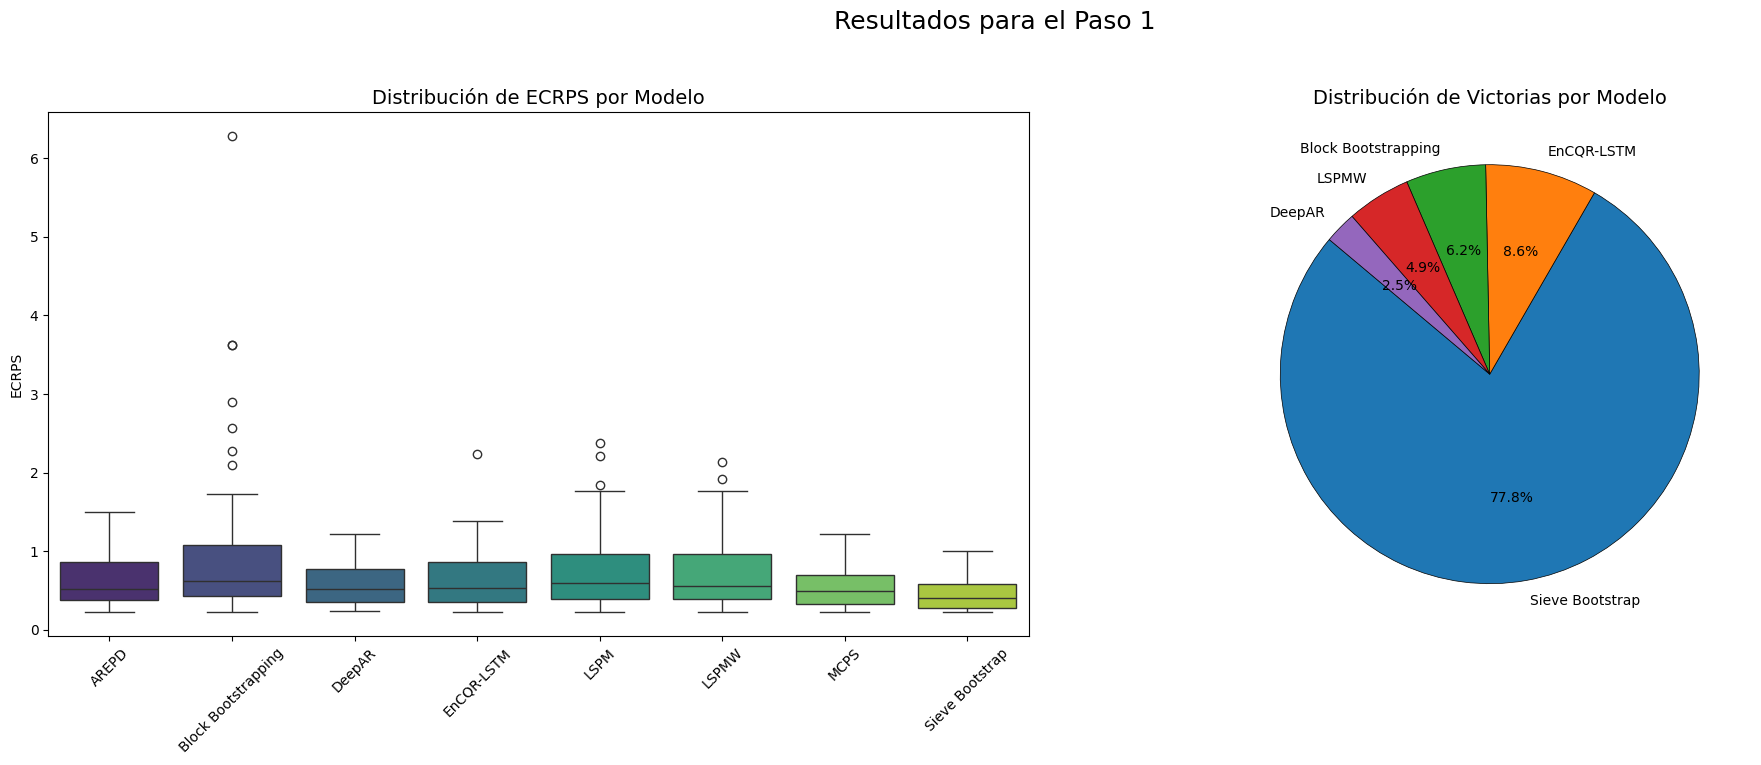

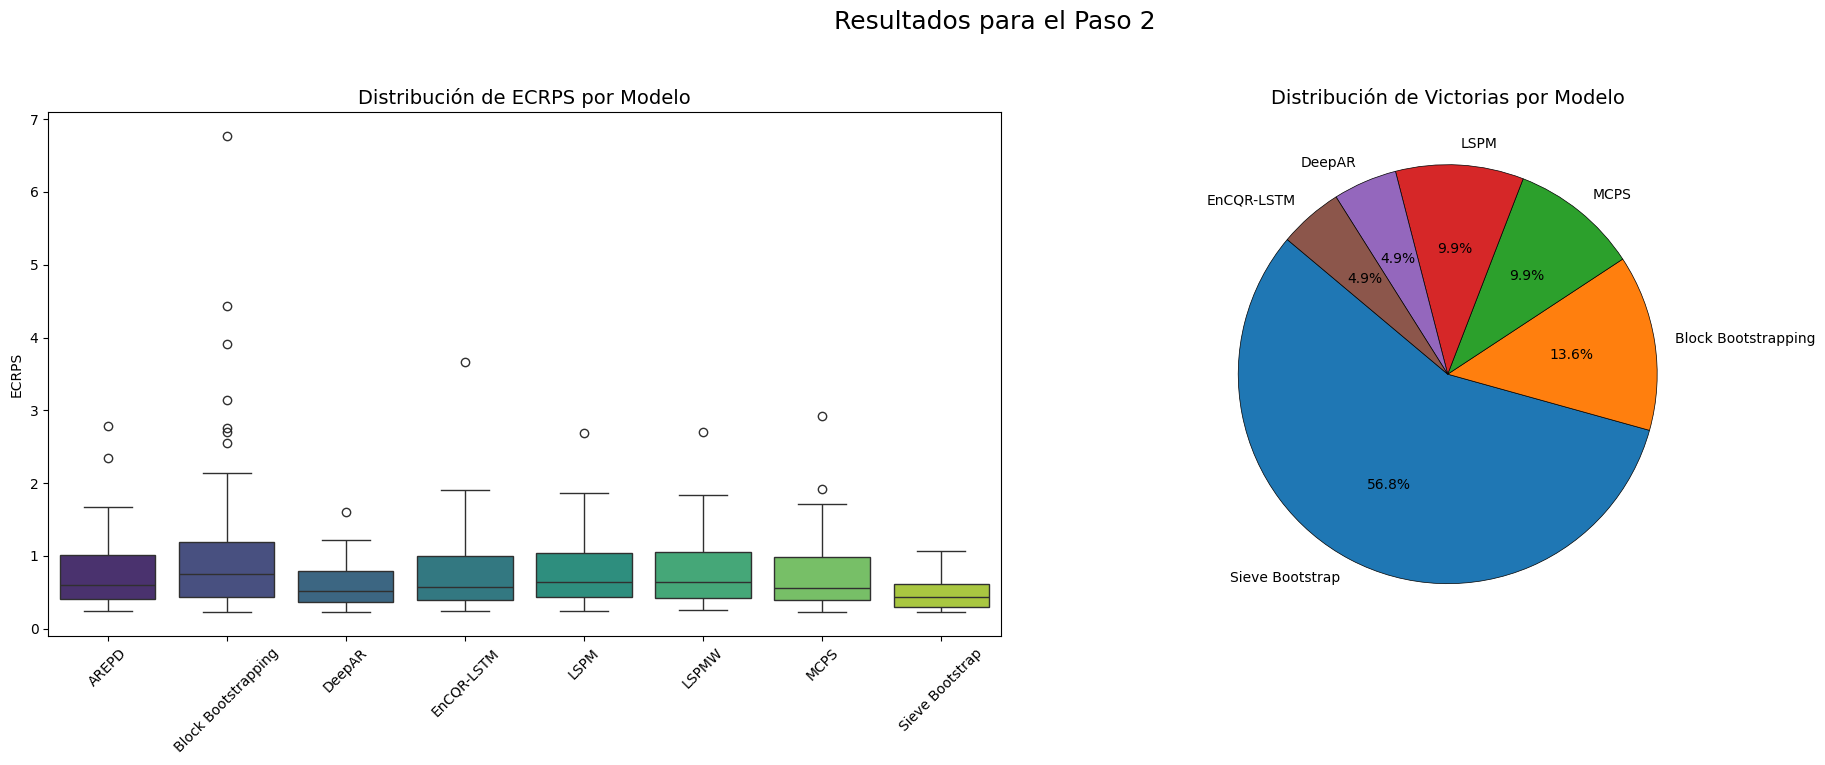

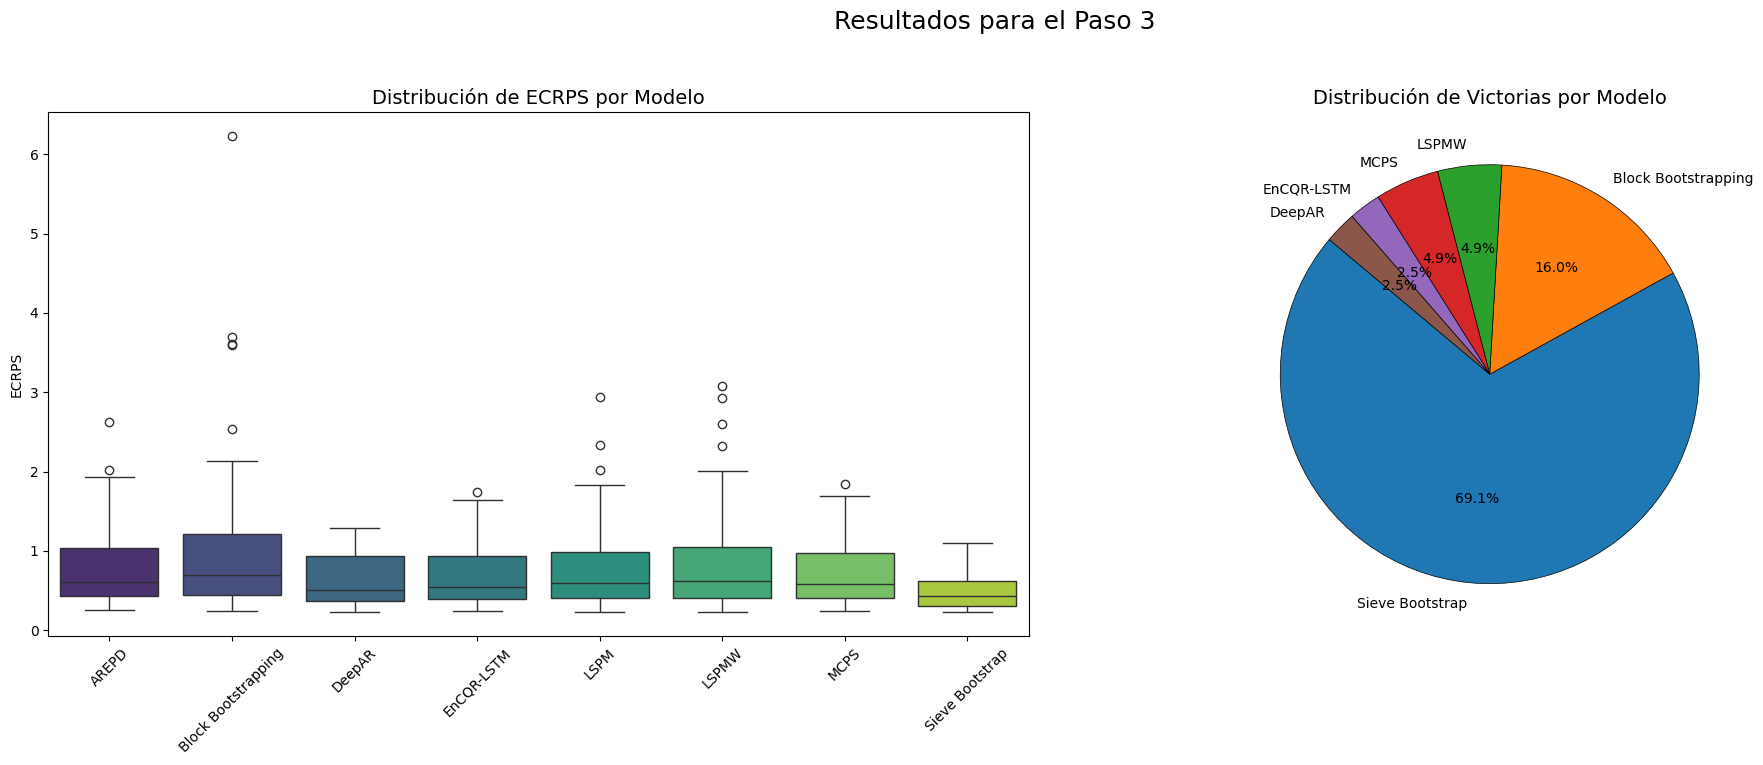

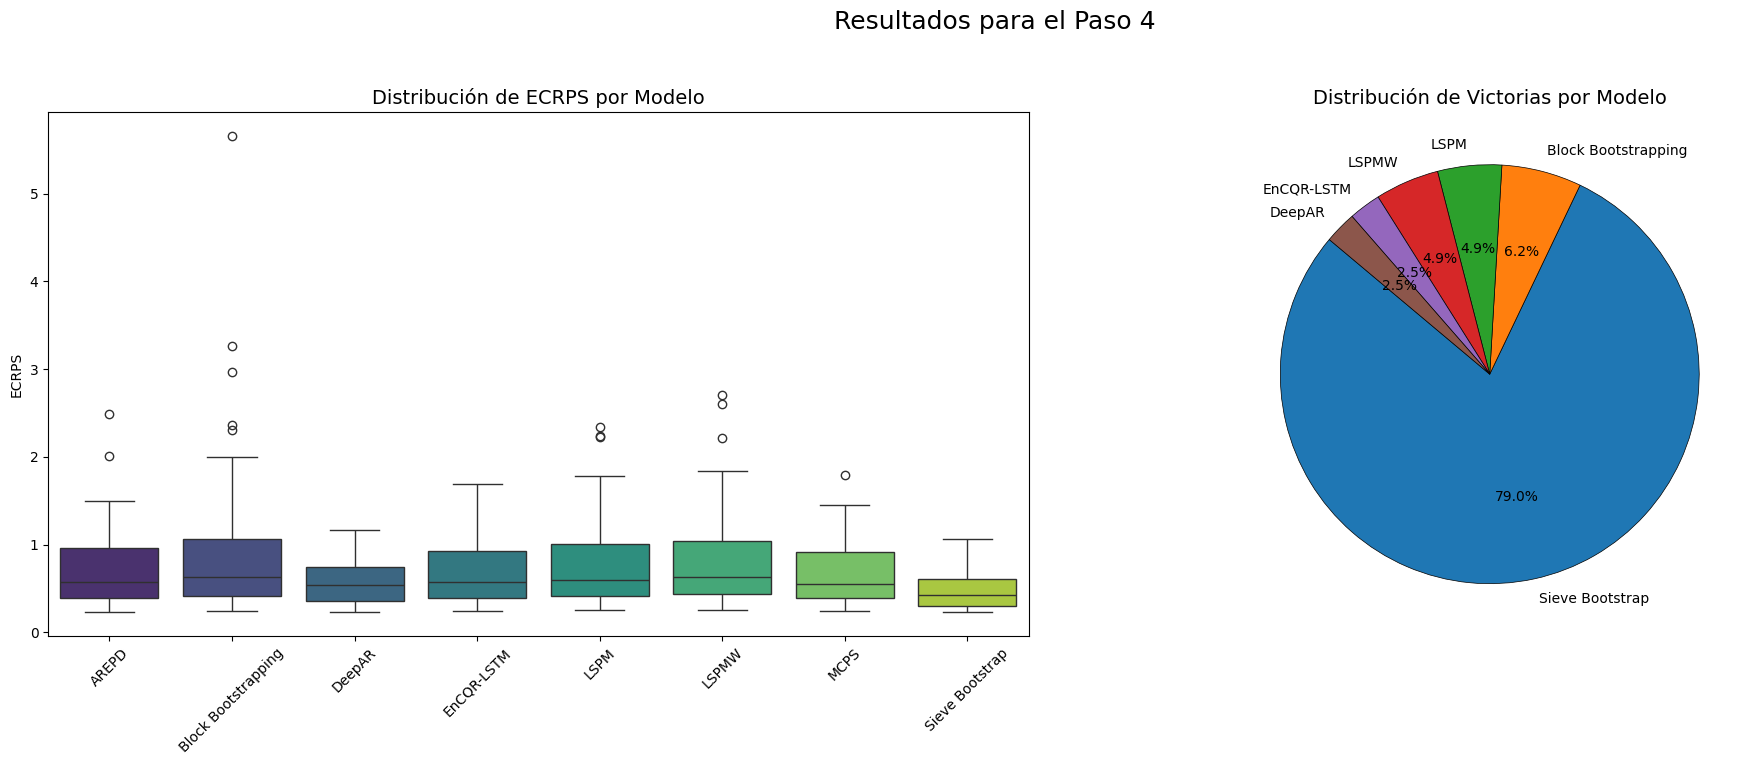

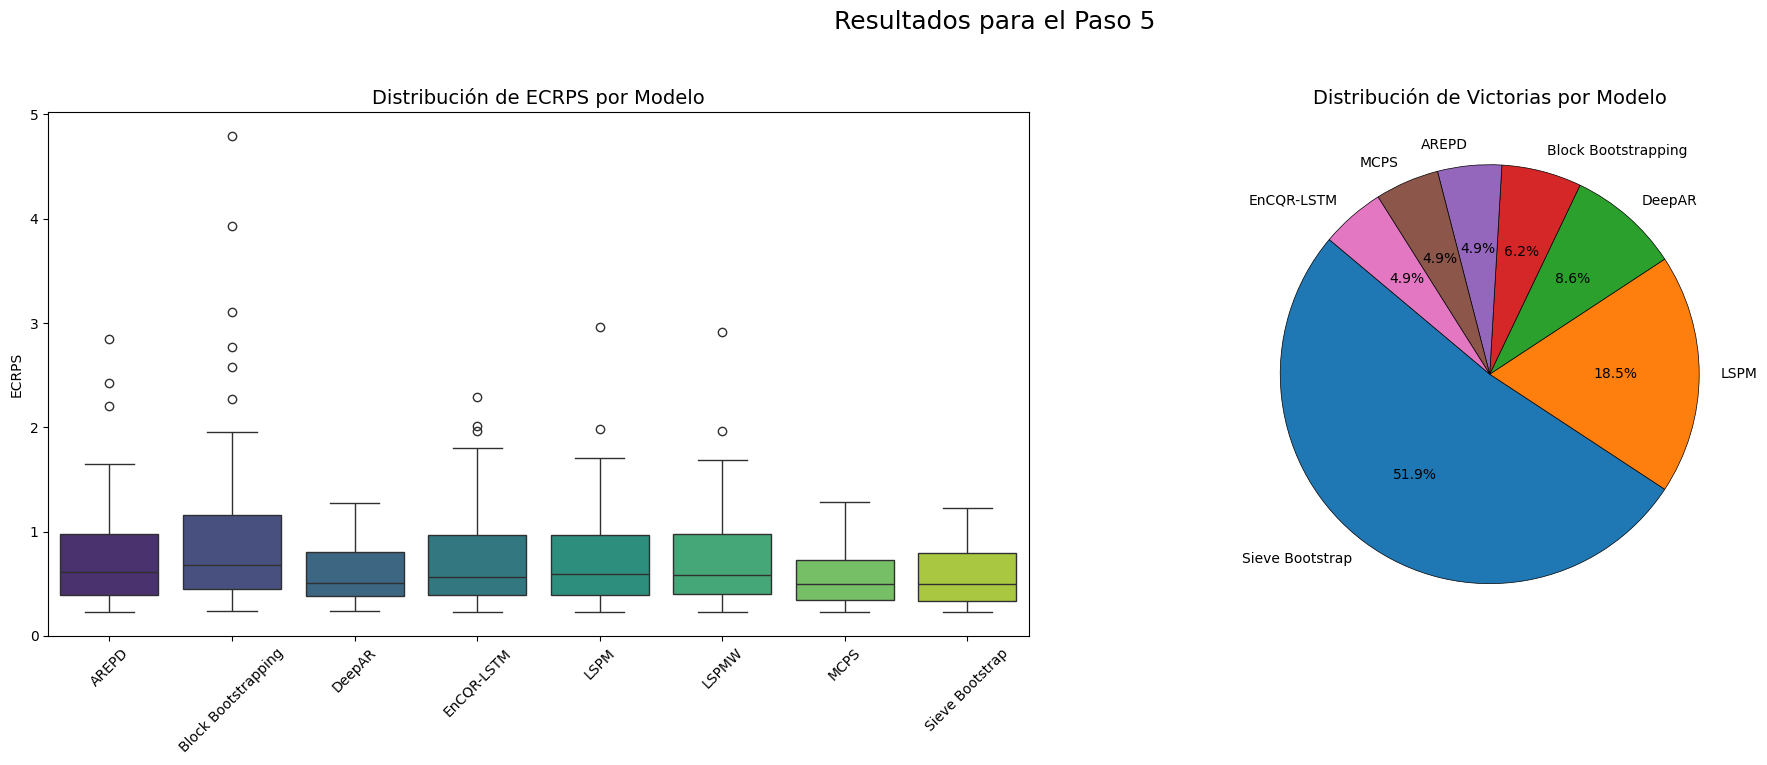

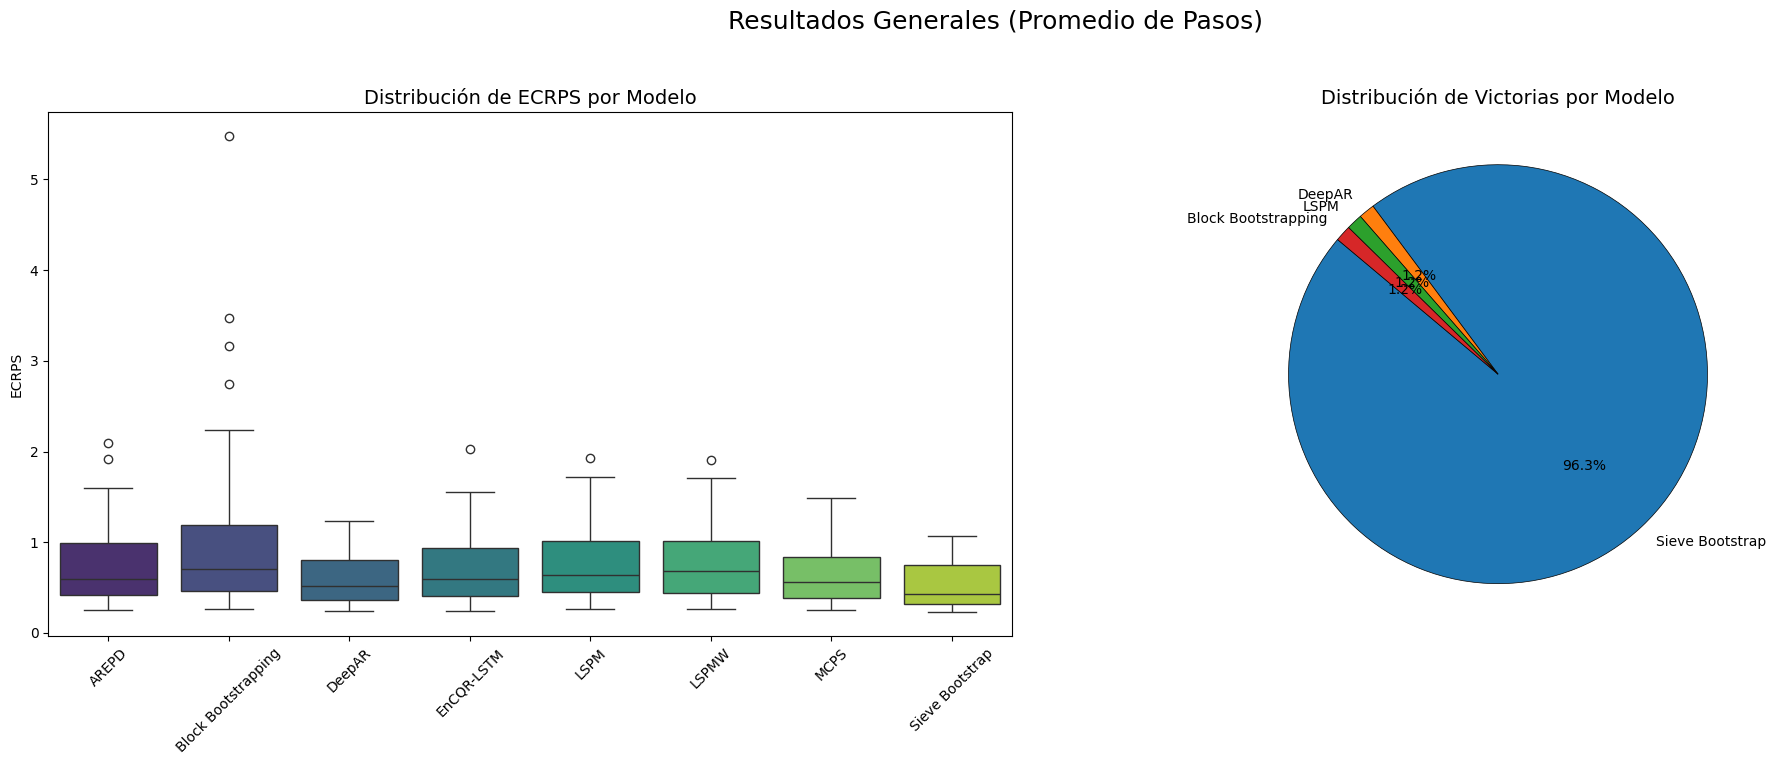


✅ Simulación completa con 120 escenarios finalizada.


In [2]:
# ===================================================================
# EJECUCIÓN COMPLETA (120 ESCENARIOS)
# ===================================================================

# Se crea una instancia del corredor de escenarios
runner_completo = ScenarioRunnerAdaptado(seed=420)

# Se ejecuta el pipeline para los 120 escenarios definidos
# El resultado se guardará y actualizará constantemente en este archivo
runner_completo.run(n_scenarios=120, excel_filename="resultados_acumulativos_120_escenarios.xlsx")

print("\n✅ Simulación completa con 120 escenarios finalizada.")